# Let's import the data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib notebook

In [5]:
diabetes = pd.read_csv('C:/Users/Nyambura/Desktop/Datasets, Projects/diabetes.csv')

In [6]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**"Outcome" is the feature we are going to predict. 0 means No diabetes and 1 means Has diabetes. Of these 768 data points, let's find out how many are labeled as 0 and 1**

In [10]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


**Let's Visualize this outcome**

C:\Users\Nyambura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


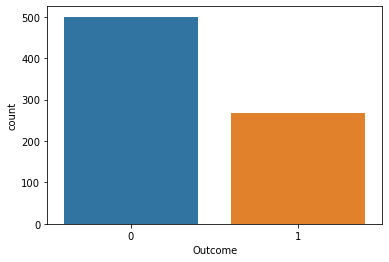

In [13]:
sns.countplot(diabetes['Outcome'], label = 'Count')

In [14]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**K-Nearest Neighbours to Predict Diabetes**
**To make a prediction for a new point in the dataset, the algorithm fins the closest data points in the training set--its "nearest neighbors"**

**First let's investigate the connection between model complexity and accuracy**

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify = diabetes['Outcome'], random_state = 66)

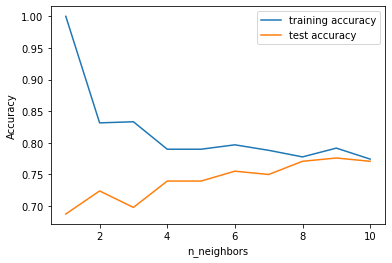

In [16]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    
    # build the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)
    
    # record the training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    
    # record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

**Let's check the accuray score of the nearest k_neighbors algorithm to predict diabetes**

In [17]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
print('Accuracy of K-NN Classifier on the training set :{:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN Classifier on the test set :{:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN Classifier on the training set :0.79
Accuracy of K-NN Classifier on the test set :0.78


## Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train, y_train)
print('Accuracy of Decision Tree Classifier on the training set :{:.2f}'.format(tree.score(x_train, y_train)))
print('Accuracy of Decision Tree Classifier on the test set :{:.2f}'.format(tree.score(x_test, y_test)))

Accuracy of Decision Tree Classifier on the training set :1.00
Accuracy of Decision Tree Classifier on the test set :0.71


## Random Tree Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)
print('Accuracy of Random Forest Classifier on the training set :{:.2f}'.format(rf.score(x_train, y_train)))
print('Accuracy of Random Forest Classifier on the test set :{:.2f}'.format(rf.score(x_test, y_test)))

Accuracy of Random Forest Classifier on the training set :1.00
Accuracy of Random Forest Classifier on the test set :0.79


**The accuracy on the training set with Decision Tree Classifier and Random Tree Classifier is 100%, while the test set accuracy is much worse with Decision Tree Classifer and better by 1% with Random Tree Classifier.**

**This is indicates that with Decision Tree Classifier, the trr is overfitting and not generalizing will to new data. Therefore we need to apply pruning to the tree**

**Let's do this by setting the maximum depth, limiting the depth of the tree decreases overfitiing**

In [21]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree.fit(x_train, y_train)
print('Accuracy of Decision Tree Classifier on the training set :{:.2f}'.format(tree.score(x_train, y_train)))
print('Accuracy of Decision Tree Classifier on the test set :{:.2f}'.format(tree.score(x_test, y_test)))

Accuracy of Decision Tree Classifier on the training set :0.77
Accuracy of Decision Tree Classifier on the test set :0.74


**The Accuracy has decreased but there's an improvement on the test set**

**Feature Importance**

**Feature importance shows how each feature is of importance for the decision a decision tree classifier makes. It is a number between 0 and 1, where 0 means "not used at all" and 1 means "perfectly predicts the target".**



<IPython.core.display.Javascript object>


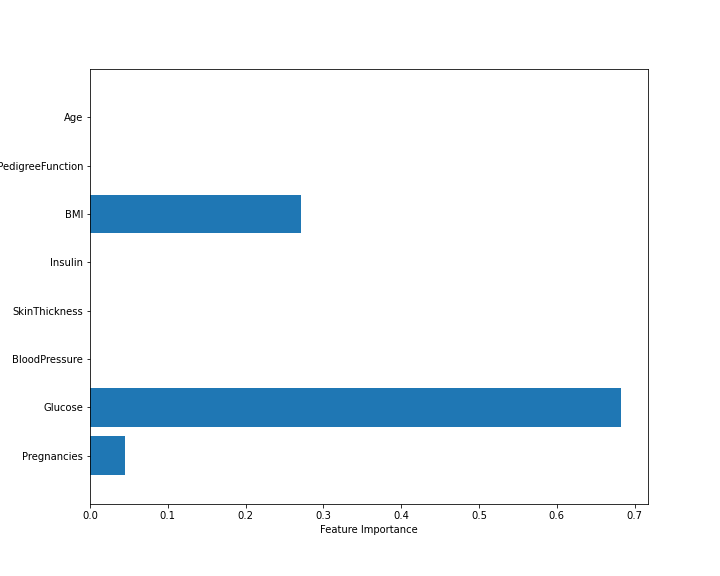

In [38]:
def feature_importance(model):
    plt.figure(figsize = (10,8))
    n_features = 8
    diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), diabetes_features) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)
feature_importance(tree)

**Glucose feature is used the most to predict diabetes**

**Deep Learning to predict diabetes**

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 42)
mlp.fit(x_train, y_train)
print('Accuracy of Neural Network Classifier on the training set :{:.2f}'.format(mlp.score(x_train, y_train)))
print('Accuracy of Neural Network Classifier on the test set :{:.2f}'.format(mlp.score(x_test, y_test)))

Accuracy of Neural Network Classifier on the training set :0.73
Accuracy of Neural Network Classifier on the test set :0.72


**The accuracy of the Multilayer perceptrons (MLP) is not as good as the other models at all, this is likely due to scaling of the data.**

**Deep learning algorithms also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1.**

**Let's re-scale our data so that it fulfills these requirements to predict diabetes with a good accuracy.**

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

mlp = MLPClassifier(random_state = 0)
mlp.fit(x_train_scaled, y_train)

print('Accuracy of Neural Network Classifier on the training set :{:.2f}'.format(mlp.score(x_train_scaled, y_train)))
print('Accuracy of Neural Network Classifier on the test set :{:.2f}'.format(mlp.score(x_test_scaled, y_test)))

Accuracy of Neural Network Classifier on the training set :0.82
Accuracy of Neural Network Classifier on the test set :0.80


C:\Users\Nyambura\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Let’s increase the number of iterations, alpha parameter and add stronger parameters to the weights of the model**

In [32]:
mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0)
mlp.fit(x_train_scaled, y_train)

print('Accuracy of Neural Network Classifier on the training set :{:.2f}'.format(mlp.score(x_train_scaled, y_train)))
print('Accuracy of Neural Network Classifier on the test set :{:.2f}'.format(mlp.score(x_test_scaled, y_test)))

Accuracy of Neural Network Classifier on the training set :0.81
Accuracy of Neural Network Classifier on the test set :0.80


**The result is good, but we are not able to increase the test accuracy further. Therefore, our best model so far is default deep learning model after scaling.**

**Let's plot a heat map of the first layer weights in a neural network learned on the to predict diabetes using the data set.**

<IPython.core.display.Javascript object>


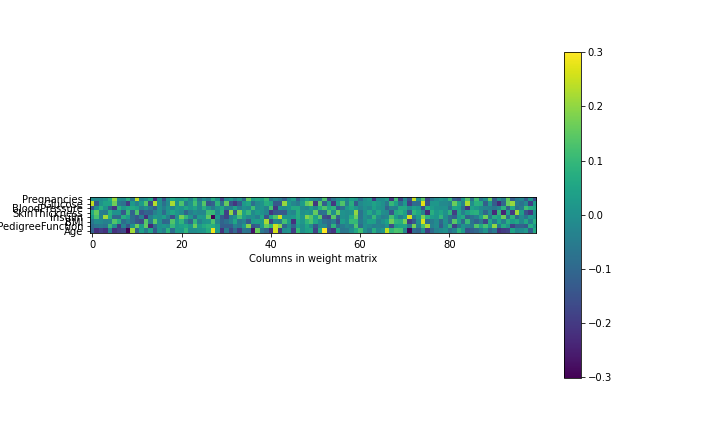

In [37]:
plt.figure(figsize = (10, 6))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap = 'viridis')
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

plt.yticks(range(8), diabetes_features)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()
plt.show()